# **SPLIT LATITUDE**

## *About and members:* 👤

Group:
> Igó Ferreira Melo Silva (20220155214)

> Gilherme Barboza de Sousa (20220007418)

> Davi Nasiasene Amorim (20220056987)

This is a notebook created as a project for Introduction to Data Science subject, in which we will explore a dataset that contains several informations about Brazilian municipalities.

Through the analysis made it, will be possible to answer three questions:

+ Which line of business has the most impact on a city's GDP?

+ Does the average temperature where we live impact longevity?

+ Which parallel would divide Brazil so that half of the population would be in the north and the other half in the south?

## *The Dataset:* 🌏

### **Dataset Link**

https://www.kaggle.com/datasets/crisparada/brazilian-cities?select=BRAZIL_CITIES.csv

### **Context**

This dataset is a compilation of several publicly available information about Brazilian Municipalities.

## Importing the Dataset and Libraries: 📖

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/IgoSilvaUFPB/projeto_ICD/main/BRAZIL_CITIES.csv'
df = pd.read_csv(url, sep = ';')
df

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,COMP_R,COMP_S,COMP_T,COMP_U,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,POST_OFFICES
0,Alvorada,RS,0,195673,195483,190,60221,60221,0,194483,...,32,117,0,0,58183,17062,71,0,0,1
1,Montenegro,RS,0,59415,59332,83,19953,18142,1811,49775,...,67,126,0,0,26888,10365,114,0,0,1
2,São Gabriel,RS,0,60425,60356,69,20169,17851,2318,53292,...,36,94,0,0,18038,6849,17,0,0,1
3,Candeias,BA,0,83158,83158,0,24971,22901,2070,67850,...,4,40,0,0,11322,7260,4,0,0,1
4,Itaparica,BA,0,20725,20685,40,6364,6364,0,19132,...,2,9,0,0,1491,985,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,Marajá Do Sena,MA,0,8051,8051,0,1759,260,1499,1158,...,0,0,0,0,11,634,0,0,0,0
5556,São Valério,TO,0,4383,4383,0,1347,806,541,2718,...,0,1,0,0,0,0,0,0,0,0
5557,Januário Cicco,RN,0,9011,9011,0,2469,936,1533,3365,...,1,1,0,0,0,0,0,0,0,0
5558,São Domingos,PB,0,2855,2855,0,829,302,527,980,...,0,12,0,0,0,0,0,0,0,0


## Converting Latitude and Longitude to Numbers

In [3]:
df["LAT"] = df["LAT"].str.replace('.', '', regex=True)
df.loc[df["LAT"].str[0].isin(['0', '1', '2', '3', '4', '5']), "LAT"] = df["LAT"].str[:1] + '.' + df["LAT"].str[1:]
df.loc[df["LAT"].str[0].isin(['-']) & df["LAT"].str[1].isin(['1', '2', '3']) & df["STATE"].isin(['RS', 'BA', 'MT', 'GO', 'DF', 'MS', 'MG', 'ES', 'RJ', 'SP', 'SC', 'PR']), "LAT"] = df["LAT"].str[:3] + '.' + df["LAT"].str[3:]
df.loc[df["LAT"].str[0].isin(['-']) & df["LAT"].str[1].isin(['4', '5', '6', '7', '8', '9']) & df["STATE"].isin(['RS', 'BA', 'MT', 'GO', 'DF', 'MS', 'MG', 'ES', 'RJ', 'SP', 'SC', 'PR']), "LAT"] = df["LAT"].str[:2] + '.' + df["LAT"].str[2:]
df.loc[df["LAT"].str[0].isin(['-']) & df["STATE"].isin(['RR', 'AP', 'AM', 'AC', 'RO', 'TO', 'MA', 'PA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE']), "LAT"] = df["LAT"].str[:2] + '.' + df["LAT"].str[2:]
df["LAT"] = pd.to_numeric(df["LAT"])

df["LONG"] = df["LONG"].str.replace('.', '', regex=True)
df.loc[df["LONG"].str[1].isin(['3', '4', '5', '6', '7']), "LONG"] = df["LONG"].str[:3] + '.' + df["LONG"].str[3:]
df["LONG"] = pd.to_numeric(df["LONG"])

df["AREA"] = df["AREA"].str.replace(',', '', regex=True)
df["AREA"] = pd.to_numeric(df["AREA"])

## Calculating Half of the Population Value

In [4]:
total_population = df["IBGE_RES_POP"].sum()
half_population = total_population / 2
half_population

95360355.5

## Selecting the Needed Columns

In [5]:
df_split_lat = df[["CITY","IBGE_RES_POP","LAT","LONG","AREA"]]
df_split_lat

,CITY,IBGE_RES_POP,LAT,LONG,AREA
0,Alvorada,195673,-29.997493,-51.077729,71.60
1,Montenegro,59415,-29.688119,-51.461299,424.85
2,São Gabriel,60425,-30.336760,-54.320478,5051.85
3,Candeias,83158,-12.671923,-38.543596,251.63
4,Itaparica,20725,-12.881489,-38.684030,118.04
...,...,...,...,...,...
5555,Marajá Do Sena,8051,-4.620313,-45.457238,1402.59
5556,São Valério,4383,-1.197307,-48.232948,2519.59
5557,Januário Cicco,9011,-6.156098,-35.600892,170.74
5558,São Domingos,2855,-6.815925,-37.942603,169.11


## Sorting by Latitude

In [6]:
df_sorted = df_split_lat.sort_values("LAT")
df_sorted

,CITY,IBGE_RES_POP,LAT,LONG,AREA
453,Chuí,5917,-33.687567,-53.462675,202.39
4905,Santa Vitória Do Palmar,30990,-33.519860,-53.367006,5195.67
128,Jaguarão,27931,-32.563569,-53.377523,2052.41
4526,Arroio Grande,18470,-32.236344,-53.082248,2514.76
5071,Rio Grande,197228,-32.050446,-52.086770,2708.38
...,...,...,...,...,...
2974,Bonfim,10943,3.350289,-59.878007,8095.42
3025,Amajari,9327,3.652118,-61.420590,28472.31
5171,Oiapoque,20509,3.851131,-51.830553,23034.39
3162,Normandia,8940,3.882978,-59.635206,6966.81


## Calculating the Cumulative Sum of Population from South to North

In [7]:
df_sorted["CUMULATIVE_POP"] = df_sorted["IBGE_RES_POP"].cumsum()
df_sorted

,CITY,IBGE_RES_POP,LAT,LONG,AREA,CUMULATIVE_POP
453,Chuí,5917,-33.687567,-53.462675,202.39,5917
4905,Santa Vitória Do Palmar,30990,-33.519860,-53.367006,5195.67,36907
128,Jaguarão,27931,-32.563569,-53.377523,2052.41,64838
4526,Arroio Grande,18470,-32.236344,-53.082248,2514.76,83308
5071,Rio Grande,197228,-32.050446,-52.086770,2708.38,280536
...,...,...,...,...,...,...
2974,Bonfim,10943,3.350289,-59.878007,8095.42,190671502
3025,Amajari,9327,3.652118,-61.420590,28472.31,190680829
5171,Oiapoque,20509,3.851131,-51.830553,23034.39,190701338
3162,Normandia,8940,3.882978,-59.635206,6966.81,190710278


## Split Latitude

In [8]:
split_latitude = df_sorted.loc[df_sorted["CUMULATIVE_POP"] >= half_population, "LAT"].iloc[0]
degrees = int(abs(split_latitude))
minutes = int((abs(split_latitude) - degrees) * 60)
seconds = (abs(split_latitude) - degrees - minutes/60) * 3600
dms = "Split Latitude: {} degrees {} minutes {:.2f} seconds South".format(degrees, minutes, seconds)
dms

'Split Latitude: 20 degrees 6 minutes 53.15 seconds South'

## Ploting the split latitude line

In [9]:
# setting palette and style
sns.set(style="whitegrid", palette="pastel", color_codes=True)

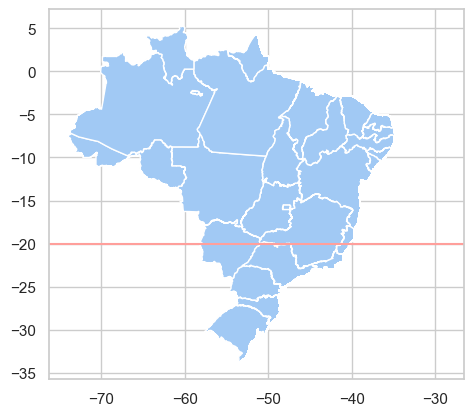

In [10]:
# set the filepath and load
fp = "plotagem_brazil/BRA_adm1.shp"
#reading the file stored in variable fp
map_df = gpd.read_file(fp)
map_df.plot()
plt.axhline(y=-20, color='r', linestyle='-')
plt.show()

## Listing the 10 Closest Cities to the split latitude

In [11]:
target_latitude = split_latitude
df_sorted["DISTANCE_FROM_TARGET"] = np.abs(df_sorted["LAT"] - target_latitude)
closest_cities = df_sorted.nsmallest(10, "DISTANCE_FROM_TARGET").sort_values("LONG")
closest_cities

,CITY,IBGE_RES_POP,LAT,LONG,AREA,CUMULATIVE_POP,DISTANCE_FROM_TARGET
4116,Jaraguari,6341,-20.103740,-54.440684,2912.82,95387295,0.011023
1261,Paranapuã,3815,-20.099806,-50.586719,140.35,95417775,0.014958
1624,Dolcinópolis,2096,-20.122871,-50.515363,77.94,95338813,0.008107
671,Rio Acima,9090,-20.095130,-43.790854,229.81,95439105,0.019633
4986,Alvinópolis,15261,-20.114763,-43.066083,599.44,95372372,0.000000
4324,Sem-Peixe,2847,-20.102536,-42.841902,176.63,95390142,0.012227
5288,Raul Soares,23818,-20.101959,-42.454168,763.36,95413960,0.012805
4583,Simonésia,18298,-20.122030,-42.003857,486.54,95357111,0.007266
4722,Santana Do Manhuaçu,8582,-20.108546,-41.923497,347.36,95380954,0.006217
4641,Santa Leopoldina,12240,-20.098891,-40.533210,718.10,95430015,0.015873


## How much area is dedicated to each group?

In [12]:
area_above_latitude_df = df_split_lat[df_split_lat["LAT"] >= split_latitude]
area_sum_above_latitude = area_above_latitude_df["AREA"].sum()

area_below_latitude_df = df_split_lat[df_split_lat["LAT"] < split_latitude]
area_sum_below_latitude = area_below_latitude_df["AREA"].sum()

total_area = df_split_lat["AREA"].sum()

sum_area = "Half of the population resides in the northern region, which encompasses {:.2f}% of the total area, while the remaining half resides in the southern region, which covers {:.2f}% of the area.".format((area_sum_above_latitude/total_area)*100, (area_sum_below_latitude/total_area)*100)
sum_area

'Half of the population resides in the northern region, which encompasses 85.79% of the total area, while the remaining half resides in the southern region, which covers 14.21% of the area.'

#### It's noteworthy that even with an equal population distribution between the northern and southern regions, the significant disparity in land area between the two regions becomes apparent. Specifically, the northern region encompasses six times the land area of the southern region.